## Introduction:
### My Vivino is an online marketplace. We have a vast wine database, and we have 27 million users, mainly in North America.

### One of our leading services is a wine recommendation system. It starts to be a little old. Rules-based. We are selling wine based on our customer visit/research.

## Technical specification
### What is to be a Data Scientist?

1. Data Collecting / Cleaning
2. Data Exploration
3. Data Visualization
4. Machine Learning
5. Communication

## All libraries I have used

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset:
### Read Csv and Collect it

In [66]:
def read_data_set():
    a = pd.read_csv("Red.csv")
    b = pd.read_csv("Rose.csv")
#     c = pd.read_csv("Sparkling.csv")
#     d = pd.read_csv("Varieties.csv")
    asa = pd.concat([a, b], ignore_index = True)
    return asa
data = read_data_set()
data.head(30)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.7,100,19.90,2017
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.0,100,43.87,2016
7,Red Blend 2014,Chile,Itata Valley,Viña La Causa,3.9,100,17.52,2014
8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.6,100,10.75,2015
9,Tradition 2014,France,Minervois,Domaine des Aires Hautes,3.5,100,6.90,2014


## Cleaning Data

In [67]:
def cleaning_data(data):
    data["Year"] = data["Year"].str.replace("N.V.", "2030")
    data.dropna(inplace = True)
    return data
cleaned_data = cleaning_data(data)
cleaned_data

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
...,...,...,...,...,...,...,...,...
9058,Côte des Roses Rosé 2019,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019
9059,M Rosé 2019,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019
9060,Whispering Angel Rosé 2019,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019
9061,Vinho Verde Rosé N.V.,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,2030


## Data Exploration
Data exploration is the first step in data analysis involving the use of data visualization tools and statistical techniques to uncover data set characteristics and initial patterns. During exploration, raw data is typically reviewed with a combination of manual workflows and automated data-exploration techniques to visually explore data sets, look for similarities, patterns and outliers and to identify the relationships between different variables.

In [68]:
def data_exploration(cleaned_data):
    print(f"Shape of the data:\n{cleaned_data.shape}\n\nInformation about Data:\n")
    print(f"{cleaned_data.info()}\n\nData describing: ")
    print(f"{cleaned_data.describe()}\n\nColumns of Data: ")
    print(f"{cleaned_data.columns}\n\nIndex of Data: ")
    print(f"{cleaned_data.index}\nAfter 2011 years data")
    my_year = cleaned_data[(cleaned_data["Year"].astype(int) > 2011)]
    print(my_year.head(10))
    print(f"{cleaned_data.groupby(cleaned_data['Country']).count()}")
info_about_data = data_exploration(cleaned_data)
info_about_data

Shape of the data:
(9063, 8)

Information about Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9063 entries, 0 to 9062
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9063 non-null   object 
 1   Country          9063 non-null   object 
 2   Region           9063 non-null   object 
 3   Winery           9063 non-null   object 
 4   Rating           9063 non-null   float64
 5   NumberOfRatings  9063 non-null   int64  
 6   Price            9063 non-null   float64
 7   Year             9063 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 566.6+ KB
None

Data describing: 
            Rating  NumberOfRatings        Price
count  9063.000000      9063.000000  9063.000000
mean      3.883813       408.560852    37.979019
std       0.308576       939.407032    83.300965
min       2.500000        25.000000     3.550000
25%       3.700000        64.000000    10.2400

## Data Analysis
Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making. Data analysis has multiple facets and approaches, encompassing diverse techniques under a variety of names, and is used in different business, science, and social science domains.

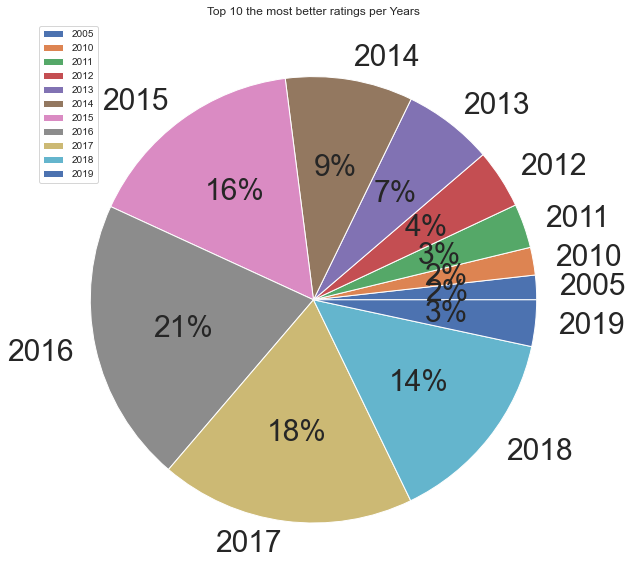

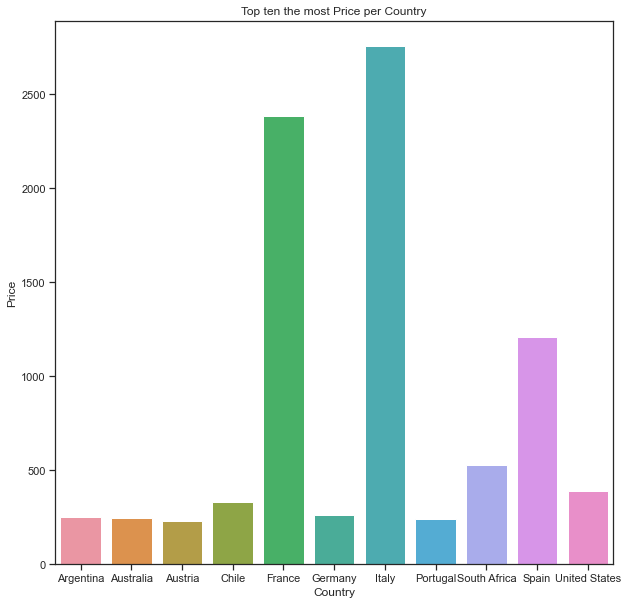

In [69]:
def data_analysis(cleaned_data):
    plt.figure(figsize=(10,20))
    just_take = cleaned_data.groupby(cleaned_data["Year"]).count()
    some = just_take[(just_take["Rating"] > 100)]
    el = some["Rating"]
    labels = some.index.unique()
    textprops = {"fontsize":30}
    plt.pie(el, labels=labels, autopct='%.0f%%', textprops=textprops)
    plt.title("Top 10 the most better ratings per Years") # Here you can see the most popular and better rating does have 2016th year
    plt.legend(prop = {'size' : 10}, loc = 'upper left')
    plt.show()
    
    # Top 10 the most Price per Country
    plt.figure(figsize=(10, 10))
    rek = cleaned_data.groupby(cleaned_data["Country"]).count()
    check = rek[(rek["Price"]) > 200]
    sns.barplot(data=check, x=check.index, y=check["Price"])
    plt.title("Top ten the most Price per Country") 
    plt.show()

analyse_of_data = data_analysis(cleaned_data)
analyse_of_data

## Most Winery by Country

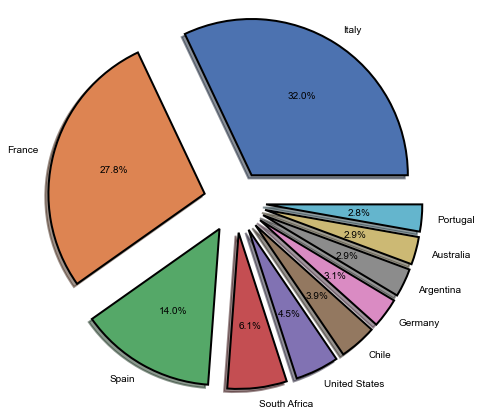

In [70]:
Country = data.groupby(by=data["Country"])
def most_Winery_by_Country(Country):
    c = Country.count()["Winery"].sort_values(ascending=False).head(10)
    plt.figure(figsize=(7, 14))
    explode=len(c.values)*[0.2]
    textprops = dict(color ="black", fontsize=10)
    wp = { 'linewidth' : 2, 'edgecolor' : "black" }
    plt.pie(c, labels=c.index, explode=explode,autopct='%1.1f%%', wedgeprops =wp, textprops=textprops, shadow=True)
    plt.show()
most_Winery_by_Country(Country)

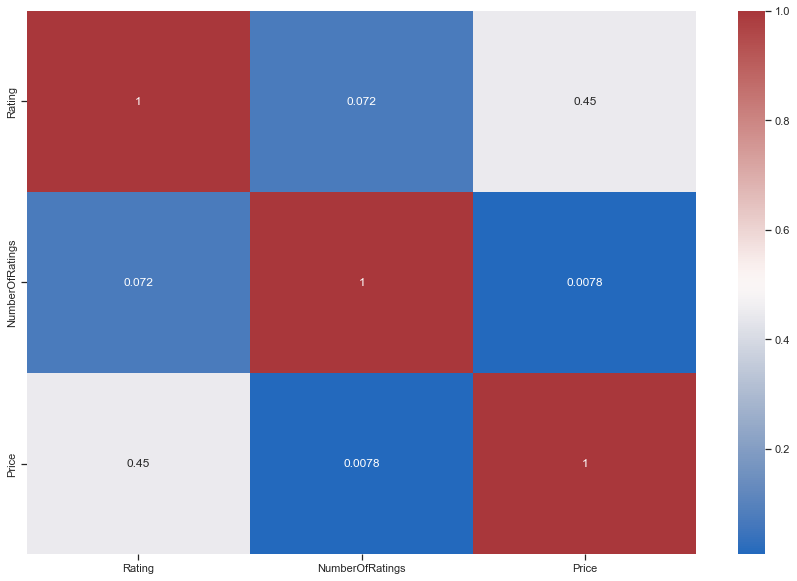

In [71]:
# Correlations Matrix
def compute_correlations_matrix(data):
    coor = data.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(coor, annot=True, cmap='vlag')
    plt.show()
compute_correlations_matrix(data)

<Figure size 1440x720 with 0 Axes>

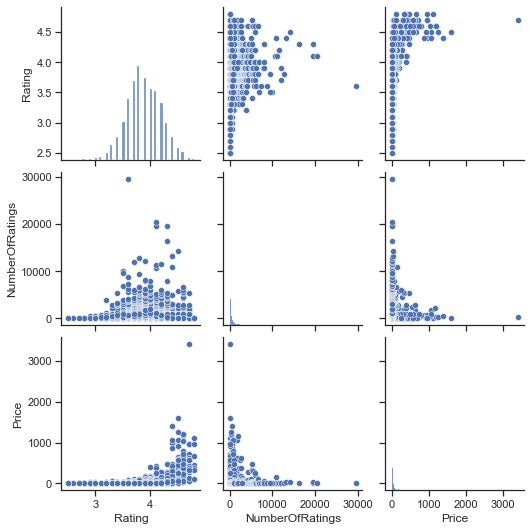

In [72]:
# Scatterplot Matrix
def print_scatter_matrix(data):
    plt.figure(figsize=(20, 10))
    sns.set_theme(style='ticks')
    sns.pairplot(data)
    plt.show()

print_scatter_matrix(data)

In [73]:
# plt.figure(figsize = [25, 15], facecolor = 'white')
# sns.heatmap(data.corr(), annot = True, linewidths = 2, cmap = "magma");

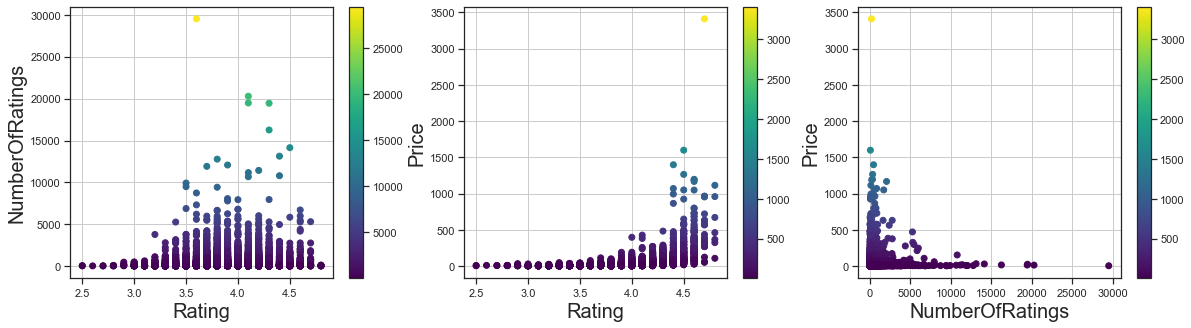

In [74]:
from itertools import combinations
def scatter_plots(data):
    col = ["Rating", "NumberOfRatings", "Price"]
    name = combinations(col,2)
    plt.figure(figsize=(20, 5))
    for i, j in zip(name, np.arange(len(col))):
        plt.subplot(1, 3, j+1)
        plt.scatter(data[i[0]], data[i[1]],c=data[i[1]], cmap="viridis")
        plt.xlabel(i[0], fontsize=20)
        plt.ylabel(i[1], fontsize=20)
        plt.colorbar()
        plt.grid()
    plt.show()
scatter_plots(data)

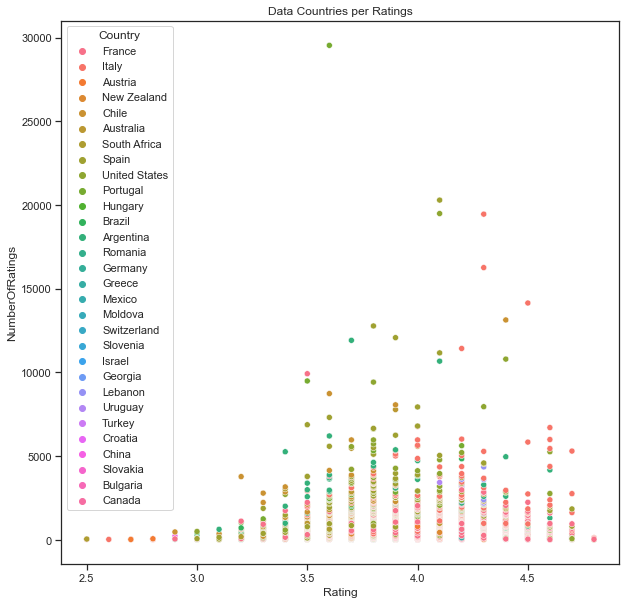

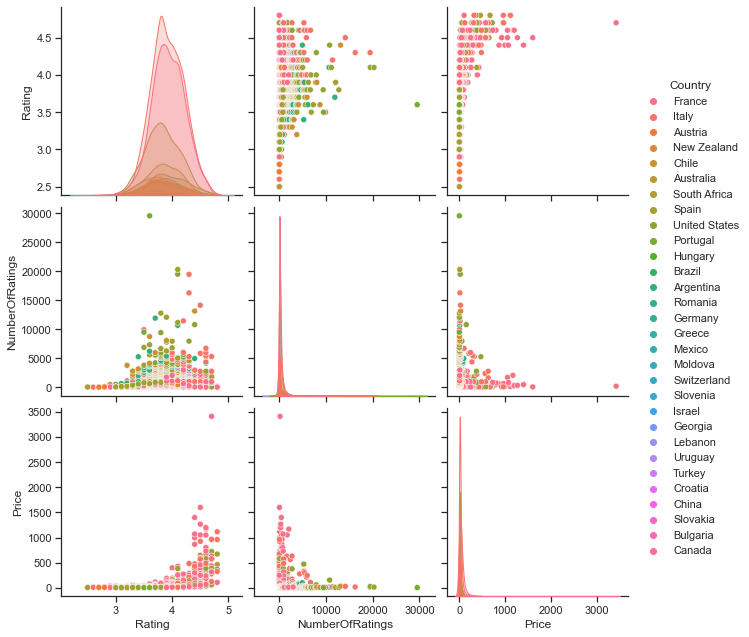

In [75]:
def data_analysis2(cleaned_data):
    # Data Countries per Ratings x and y = NumberOfRatings
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x = "Rating", y = "NumberOfRatings", data = cleaned_data, hue="Country")
    plt.title("Data Countries per Ratings")
    plt.show()
    sns.pairplot(cleaned_data, hue="Country", height=3)
    plt.show()

analyse_of_data2 = data_analysis2(cleaned_data)
analyse_of_data2

## Machine Learning
### What is Machine learning?

Machine learning (ML) is a field of inquiry devoted to understanding and building methods that 'learn', that is, methods that leverage data to improve performance on some set of tasks.It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so.Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, agriculture, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers, but not all machine learning is statistical learning. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.Some implementations of machine learning use data and neural networks in a way that mimics the working of a biological brain.In its application across business problems, machine learning is also referred to as predictive analytics.

Since this is a business marketplace, we will predict and find out the accuracy of the

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [77]:
x, y = cleaned_data[['Rating', 'Year']], cleaned_data.Price

def ML_Model_1(x, y): # I used the GradientBoostingRegressor model because it is the best model for the data I have
    X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.2, random_state=33) # In this I divided the Data into 4 types

    """
    Gradient Boosting for regression.
    This estimator builds an additive model in a forward stage-wise fashion;
    it allows for the optimization of arbitrary differentiable loss functions.
    In each stage a regression tree is fit on the negative gradient of the given loss function.
    """
    model = GradientBoostingRegressor()
    model.fit(X_train, Y_train)

    predict = model.predict(X_validation)

    print('Mean Absolute Error:', round(np.sqrt(mean_absolute_error(Y_validation, predict)), 2)) # I used mean_absolute_error in the estimation

ML_Model_1(x, y)

Mean Absolute Error: 4.31


In [78]:
def ML_nodel_2(x, y): # I used the SVR model because it is the best model for the data I have
    X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.2, random_state=33) # In this I divided the Data into 4 types

    """
     Linear regression analysis is used to predict the value
     of a variable based on the value of another variable.
     The variable you want to predict is called the dependent variable.
     The variable you are using to predict the other variable's value is called the independent variable.
    """
    model_SVR = LinearRegression()

    model_SVR.fit(X_train, Y_train)
    predict_SVR = model_SVR.predict(X_validation)

    print('Mean Absolute Error:', round(np.sqrt(mean_absolute_error(Y_validation, predict_SVR)), 2))  # I used mean_absolute_error in the estimation

ML_nodel_2(x, y)

Mean Absolute Error: 5.52


## Multiple Linear Regression
What is Multiple Linear Regression? In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.Most commonly, the conditional mean of the response given the values of the explanatory variables (or predictors) is assumed to be an affine function of those values; less commonly, the conditional median or some other quantile is used. Like all forms of regression analysis, linear regression focuses on the conditional probability distribution of the response given the values of the predictors, rather than on the joint probability distribution of all of these variables, which is the domain of multivariate analysis.

I have predicted with multiple LinearRegression the data To x data was given "Rating" and "Number of Ratings", to y data was given "Price"

In [79]:

def machine_learning(cleaned_data):
    x = cleaned_data[["Rating", "NumberOfRatings"]].values.reshape(-1, 2)
    y = cleaned_data["Price"].values
    linear = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)
    linear.fit(X_train, y_train)
    y_predict = linear.predict(X_test)

    print(f"Multiple LinearRegression: {r2_score(y_test, y_predict)}")
    print(f"Multiple LinearRegression: {mean_squared_error(y_test, y_predict)}")
machine_learning(cleaned_data)

Multiple LinearRegression: 0.26398438476894515
Multiple LinearRegression: 3858.798320103165
